In [47]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [48]:
# Read comma separated data
def splitRawData(data):
    X, y = data[:, 0:-1], data[:, -1]

    if len(X.shape)==1:
        X = np.c_[X] # convert to a column vector
    
    y = np.c_[y] #convert to a column vector

    return X,y



data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')

X,y = splitRawData(data)
m = y.shape[0]

X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [49]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    
    for count in np.arange(1,mu.size):
        mu[count] = np.mean(X[:,count])
        sigma[count] = np.std(X[:,count])
    
    for count in np.arange(1,mu.size):
        X_norm[:,count] = (X_norm[:,count]-mu[count])/sigma[count]
    
    # ================================================================
#     return X_norm, mu, sigma
    return X_norm, mu, sigma




# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)


Computed mean: [   0.         2000.68085106    3.17021277]
Computed standard deviation: [0.00000000e+00 7.86202619e+02 7.52842809e-01]


In [50]:
def  featureNormalize1(X):
    # You need to set these values correctly
    X_norm = X.copy()
#     mu = np.zeros(X.shape[1])
#     sigma = np.zeros(X.shape[1])
    
    X_min = np.zeros(X.shape[1]);
    X_max = np.zeros(X.shape[1]);

    # =========================== YOUR CODE HERE =====================
    
    for count in np.arange(1,X_min.size):
        X_min[count] = np.min(X[:,count])
        X_max[count] = np.max(X[:,count])
    
    for count in np.arange(1,X_min.size):
        X_norm[:,count] = (X_norm[:,count]-X_min[count])/X_max[count]
    
    # ================================================================
#     return X_norm, mu, sigma
    return X_norm, X_min, X_max



# call featureNormalize on the loaded data
# X_norm, X_min, X_max = featureNormalize1(X)

In [51]:
def computeCost(X, y, theta):    
    # initialize some useful values
    m = y.shape[0]  # number of training examples
    theta = np.array(theta)
    # theta = np.c_[theta] #convert to column vector
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    J = np.sum(((X.dot(theta))-y)**2)/(2*m)
    
    return J
    # ===========================================================


def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    theta = np.array(theta)
    theta = np.c_[theta] #convert to column vector
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        h = X.dot(theta)
        grad = (X.T.dot(h-y))/m
        theta = theta - (alpha*grad)
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history


theta computed from gradient descent: [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $[1.80909542e+08]


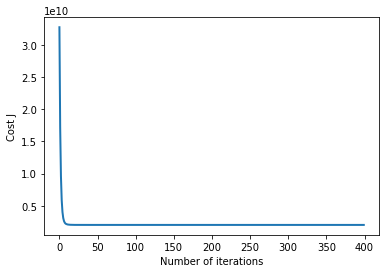

In [52]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.3
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescent(X_norm, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = np.array([1, 1650, 3]).dot(theta)   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${}'.format(price))

In [53]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    #theta = pinv(X'*X)*X'*y;
    theta=((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
    
    # =================================================================
    return theta

In [54]:
# Calculate the parameters from the normal equation

theta = normalEqn(X, y)


# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = np.array([1, 1650, 3]).dot(theta)  # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${}'.format(price))

Theta computed from the normal equations: [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $[293081.46433489]
